In [319]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Dataset.csv


In [320]:
df = pd.read_csv("/kaggle/input/dataset/Dataset.csv")

In [321]:
df.shape

(649, 33)

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     599 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        576 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  576 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      573 non-null    object 
 19  internet    649 non-null    o

In [323]:
df.describe()

,Medu,Fedu,traveltime,failures,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3
count,649.000000,576.000000,576.000000,649.000000,649.000000,604.000000,649.000000,649.000000,649.000000,580.000000,649.000000,614.000000,649.000000,611.000000,603.000000,610.000000
mean,2.514638,2.303819,1.574653,0.221880,3.930663,3.172185,3.184900,1.502311,3.536210,3.746552,11.399076,11.586319,11.906009,16.747954,1.913765,2.262295
std,1.134552,1.111076,0.744592,0.593235,0.955717,1.044684,1.175766,0.924834,1.446259,4.732890,2.745265,2.927878,3.230656,1.216812,0.830798,1.285279
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,16.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,4.000000,2.000000,11.000000,11.000000,12.000000,17.000000,2.000000,2.000000
75%,4.000000,3.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,5.000000,6.000000,13.000000,13.000000,14.000000,18.000000,2.000000,3.000000
max,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,22.000000,4.000000,5.000000


In [324]:
df.dtypes

school         object
sex            object
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu          float64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
famrel          int64
freetime      float64
goout           int64
Dalc            int64
health          int64
absences      float64
G1              int64
G2            float64
G3              int64
Feature_1     float64
Feature_2     float64
Feature_3     float64
romantic       object
dtype: object

In [325]:
df.isnull()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
646,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
647,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [326]:
df.isnull().sum()

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

Text(0.5, 1.0, 'Correlation Between Stats')

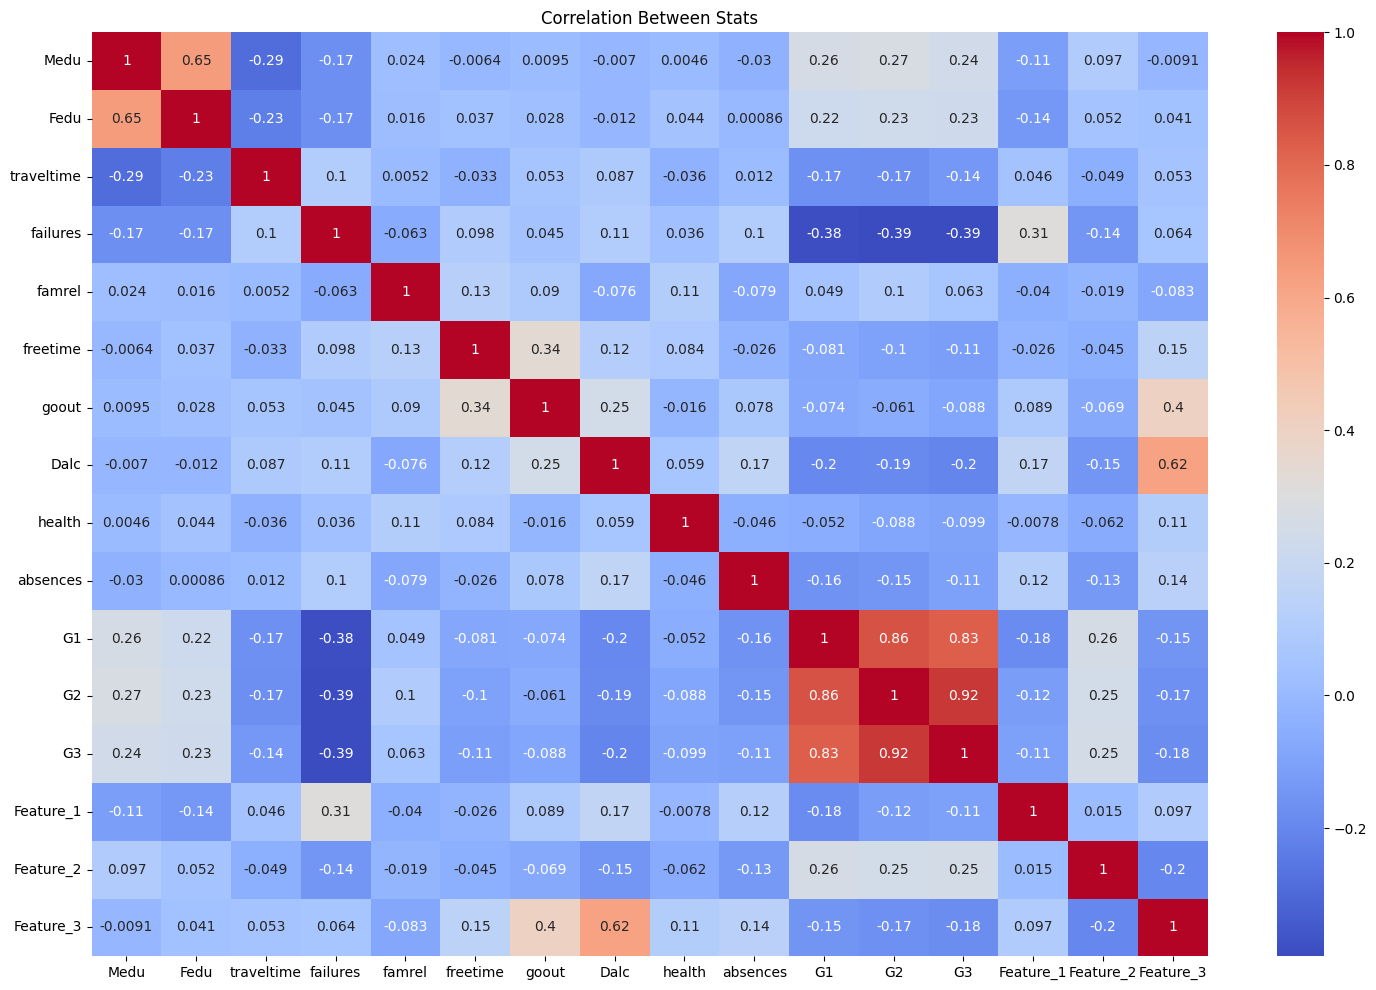

In [327]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Stats')

In [328]:
df['romantic'] = df['romantic'].replace({'yes': 1, 'no': 0})
#replacing yes and no in column of romantic with 0 and 1

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [329]:
#replacing all the columns containing yes or no with 1 and 0 respectively so as to analyze numeric data in a better manner
df = df.replace({'yes': 1, 'no': 0})

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [330]:
df['famsize']=df['famsize'].replace({'GT3':1,'LE3':0})
df['sex']=df['sex'].replace({'M':1, 'F':0})
df['address']=df['address'].replace({'U':1,'R':0})
df['Pstatus']=df['Pstatus'].replace({'T':1, 'A':0})
df['school']=df['school'].replace({'GP':1,'MS':0})

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_op

In [331]:
df.isna().sum()


school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

In [332]:
# g2 has very high correlation with g1 and g3, hence we  use linear regression to fill null values
from sklearn.linear_model import LinearRegression

train_df = df[df['G2'].notnull()]
test_df = df[df['G2'].isnull()]
X_train = train_df[['G1', 'G3']]
y_train = train_df['G2']
X_test = test_df[['G1', 'G3']]
model = LinearRegression()
model.fit(X_train, y_train)
g2_pred = model.predict(X_test)
df.loc[df['G2'].isnull(), 'G2'] = g2_pred



In [333]:
# higher has significant correlation with g1, g2 and g3, hence we  use linear regression to fill null values
train_df = df[df['higher'].notnull()]
test_df = df[df['higher'].isnull()]
X_train = train_df[['G1','G2','G3']]
y_train = train_df['higher']
X_test = test_df[['G1','G2','G3']]
model = LinearRegression()
model.fit(X_train, y_train)
a2_pred = model.predict(X_test)
df.loc[df['higher'].isnull(), 'higher'] = a2_pred

In [334]:
# freetime has significant correlation with goout, hence we  use linear regression to fill null values
train_df = df[df['freetime'].notnull()]
test_df = df[df['freetime'].isnull()]
X_train = train_df[['goout']]
y_train = train_df['freetime']
X_test = test_df[['goout']]
model = LinearRegression()
model.fit(X_train, y_train)
g2_pred = model.predict(X_test)
df.loc[df['freetime'].isnull(), 'freetime'] = g2_pred

In [335]:
# Fedu has significantly high correlation with Medu hence we  use linear regression to fill null values
train_df = df[df['Fedu'].notnull()].copy()
test_df = df[df['Fedu'].isnull()].copy()

X_train = train_df[['Medu']] 
y_train = train_df['Fedu']
X_test = test_df[['Medu']]    

model = LinearRegression()
model.fit(X_train, y_train)

fedu_pred = model.predict(X_test)
df.loc[df['Fedu'].isnull(), 'Fedu'] = fedu_pred

In [336]:
# traveltime has significant correlation with address hence we  use linear regression to fill null values
train_df = df[df['traveltime'].notnull()]
test_df = df[df['traveltime'].isnull()]
X_train = train_df[['school','address']]
y_train = train_df['traveltime']
X_test = test_df[['school','address']]
model = LinearRegression()
model.fit(X_train, y_train)
g2_pred = model.predict(X_test)
df.loc[df['traveltime'].isnull(), 'traveltime'] = g2_pred

In [337]:
df.isna().sum()

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
famrel         0
freetime       0
goout          0
Dalc           0
health         0
absences      69
G1             0
G2             0
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

In [338]:
#s=absence and famsize di not have much correlation with any of parameters, hence we eliminate null using median
median_value = df['absences'].median()
df['absences']=df['absences'].fillna(median_value)
median_value = df['famsize'].median()
df['famsize']=df['famsize'].fillna(median_value)

In [339]:
df.dtypes

school          int64
sex             int64
address         int64
famsize       float64
Pstatus         int64
Medu            int64
Fedu          float64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float64
failures        int64
schoolsup       int64
famsup          int64
paid            int64
activities      int64
nursery         int64
higher        float64
internet        int64
famrel          int64
freetime      float64
goout           int64
Dalc            int64
health          int64
absences      float64
G1              int64
G2            float64
G3              int64
Feature_1     float64
Feature_2     float64
Feature_3     float64
romantic        int64
dtype: object

In [340]:
df.isna().sum()

school         0
sex            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
famrel         0
freetime       0
goout          0
Dalc           0
health         0
absences       0
G1             0
G2             0
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

Text(0.5, 1.0, 'Correlation Between Stats')

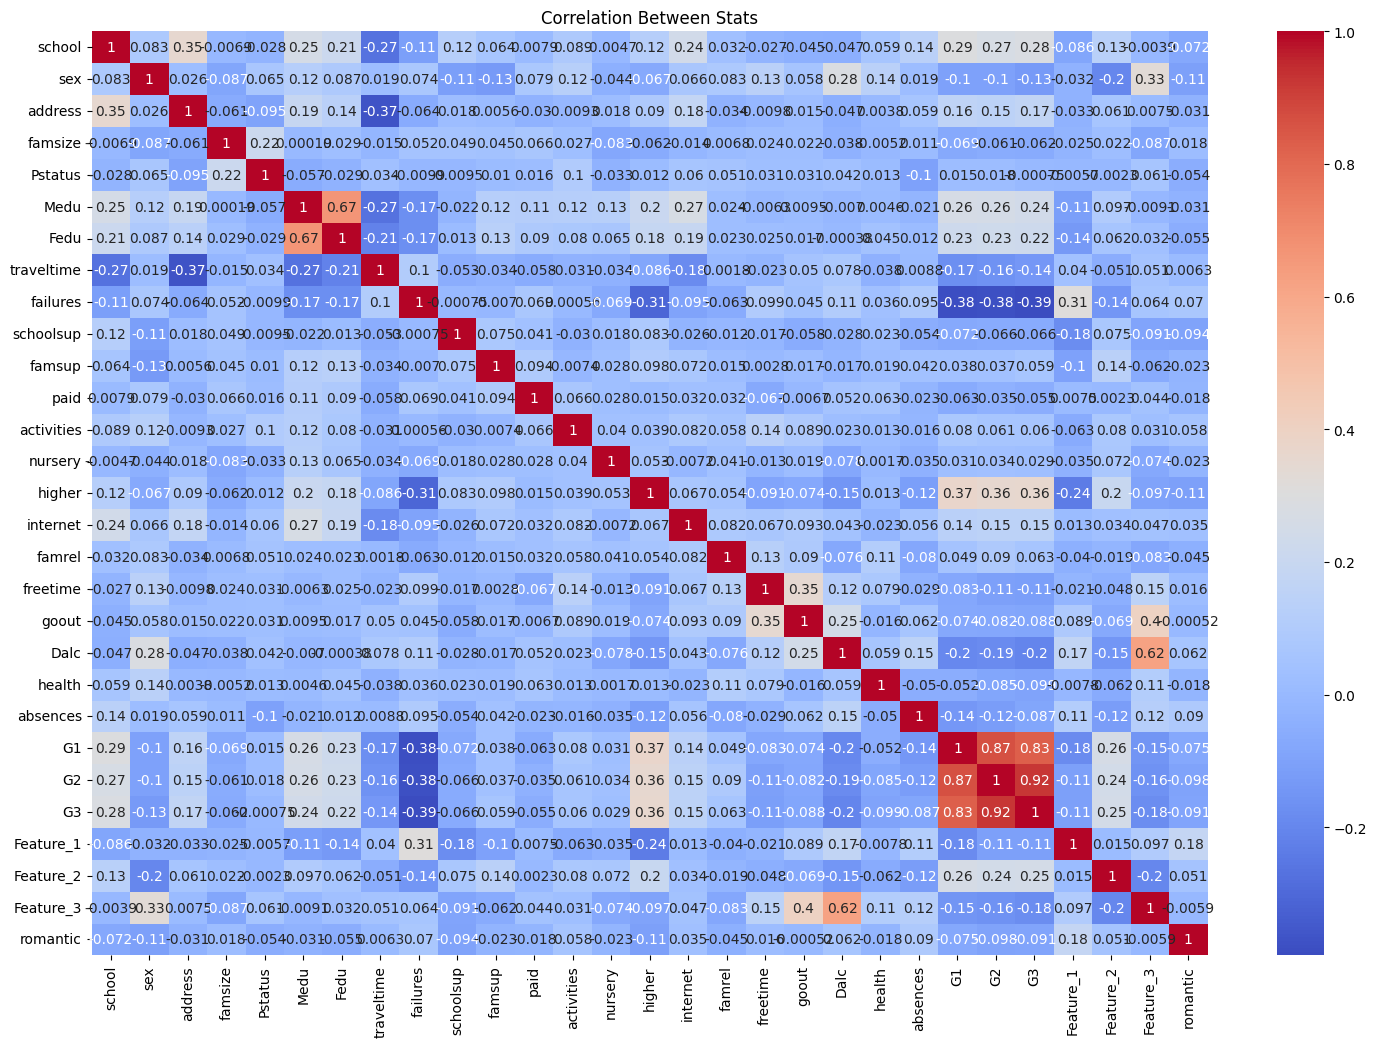

In [341]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Stats')

In [342]:
#data cleaning is done now, all null values are efficiently handled let's go for exploratory data analysis through the code

QUESTION 1: Do students with internet access at home perform better academically (G3)?


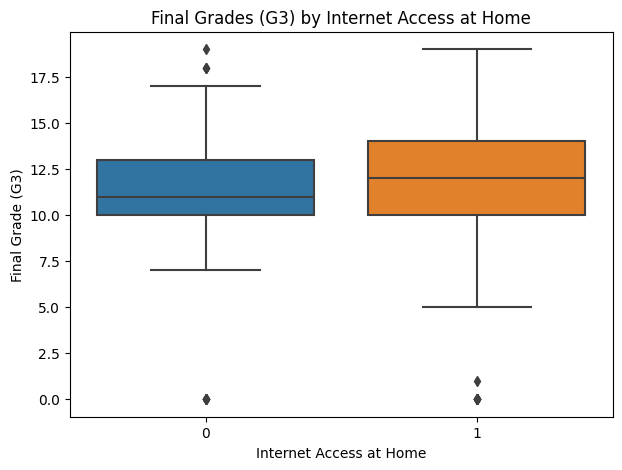

In [343]:
print("QUESTION 1: Do students with internet access at home perform better academically (G3)?")
plt.figure(figsize=(7, 5))
sns.boxplot(x='internet', y='G3', data=df)
plt.title("Final Grades (G3) by Internet Access at Home")
plt.xlabel("Internet Access at Home")
plt.ylabel("Final Grade (G3)")
plt.show()

In [344]:
print("INFERENCE:The boxplot shows that students with internet access at home (coded as 1) tend to have slightly higher median and upper quartile final grades (G3) compared to those without internet access (coded as 0). The distribution for students with internet access is also wider, with a higher maximum grade and a similar range of outliers. This suggests that having internet access at home is associated with better academic performance, although the difference is moderate and there is overlap between the two groups ")

INFERENCE:The boxplot shows that students with internet access at home (coded as 1) tend to have slightly higher median and upper quartile final grades (G3) compared to those without internet access (coded as 0). The distribution for students with internet access is also wider, with a higher maximum grade and a similar range of outliers. This suggests that having internet access at home is associated with better academic performance, although the difference is moderate and there is overlap between the two groups 


QUESTION 2: Are students with more travel time more frequently absent from school?


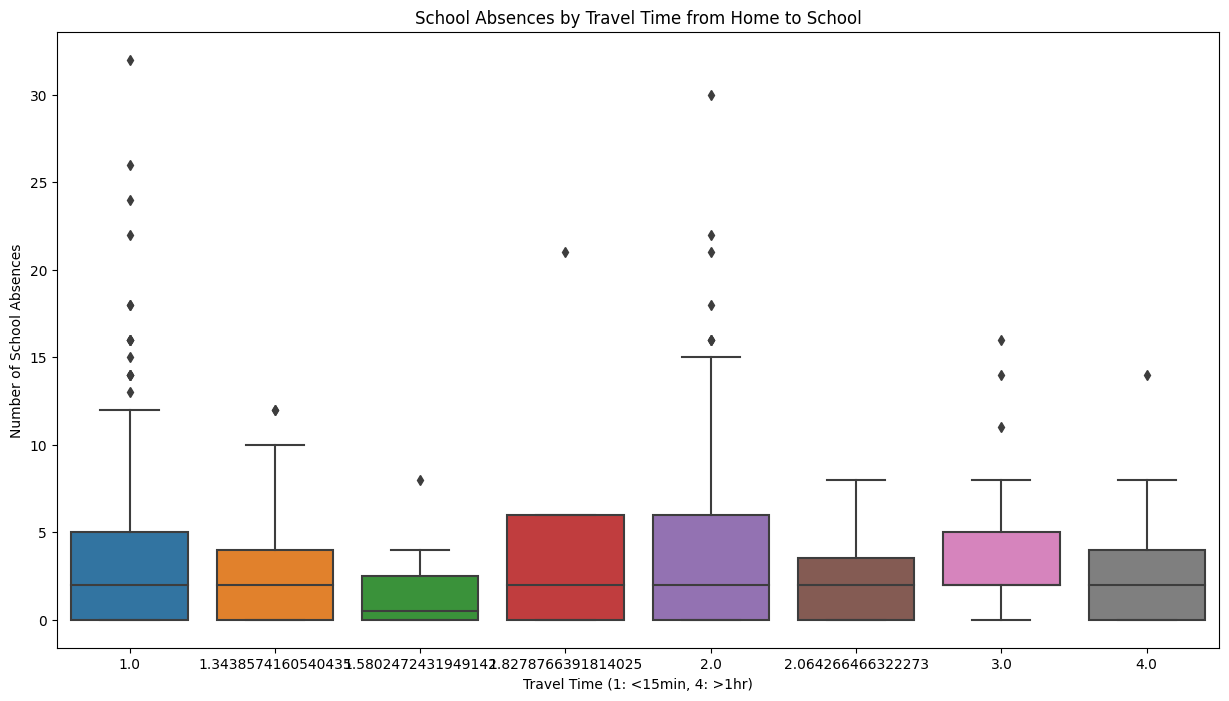

In [345]:
print ("QUESTION 2: Are students with more travel time more frequently absent from school?")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(x='traveltime', y='absences', data=df)
plt.title('School Absences by Travel Time from Home to School')
plt.xlabel('Travel Time (1: <15min, 4: >1hr)')
plt.ylabel('Number of School Absences')
plt.show()

In [346]:
print("INFERENCE: Students with longer travel times are not more frequently absent from school; absences are similar across all commute durations, and high-absence outliers are actually more common among those with shorter travel times. This suggests that factors other than travel time, such as motivation or family support, have a greater impact on school attendance, and not travel time.")

INFERENCE: Students with longer travel times are not more frequently absent from school; absences are similar across all commute durations, and high-absence outliers are actually more common among those with shorter travel times. This suggests that factors other than travel time, such as motivation or family support, have a greater impact on school attendance, and not travel time.


QUESTION 3: Are students in a romantic relationship prone to score lower overall grades (G3)?


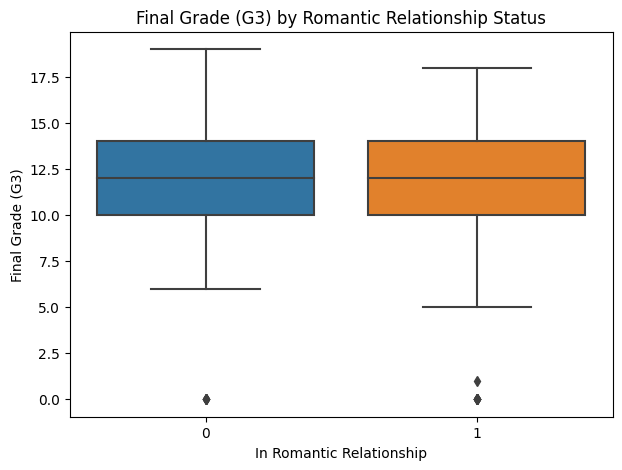

In [347]:
print("QUESTION 3: Are students in a romantic relationship prone to score lower overall grades (G3)?")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.boxplot(x='romantic', y='G3', data=df)
plt.title('Final Grade (G3) by Romantic Relationship Status')
plt.xlabel('In Romantic Relationship')
plt.ylabel('Final Grade (G3)')
plt.show()

In [348]:
print(df.groupby('romantic')['G3'].mean())

romantic
0    12.129268
1    11.523013
Name: G3, dtype: float64


In [349]:
print("INFERENCES")
print('The analysis reveals that students in romantic relationships tend to have slightly lower final grades (G3) compared to their single peers. The boxplot shows a lower median G3 (~10-11) for the "yes" group versus (~12-13) for the "no" group, with overlapping interquartile ranges but fewer high-scoring outliers in the "yes" cohort. This suggests that while relationships may correlate with modestly reduced academic performance, the effect is not universally drastic. ')
print(" Potential factors include divided attention between social and academic priorities, time management challenges, or self-selection biases (e.g., students less focused on academics may prioritize relationships). However, causation cannot be inferred—other variables like extracurricular commitments or family dynamics might also influence both relationship status and grades.")

INFERENCES
The analysis reveals that students in romantic relationships tend to have slightly lower final grades (G3) compared to their single peers. The boxplot shows a lower median G3 (~10-11) for the "yes" group versus (~12-13) for the "no" group, with overlapping interquartile ranges but fewer high-scoring outliers in the "yes" cohort. This suggests that while relationships may correlate with modestly reduced academic performance, the effect is not universally drastic. 
 Potential factors include divided attention between social and academic priorities, time management challenges, or self-selection biases (e.g., students less focused on academics may prioritize relationships). However, causation cannot be inferred—other variables like extracurricular commitments or family dynamics might also influence both relationship status and grades.


QUESTION 4: Do students who drink more alcohol have poorer family relationships?


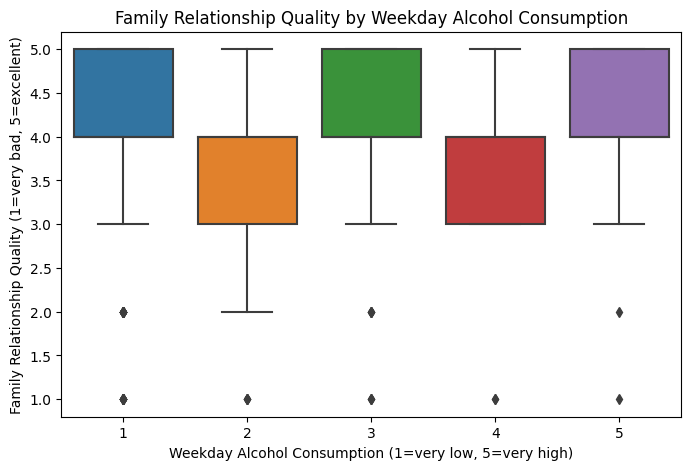

Dalc
1    4.006652
2    3.710744
3    3.837209
4    3.588235
5    4.058824
Name: famrel, dtype: float64


In [350]:
print("QUESTION 4: Do students who drink more alcohol have poorer family relationships?")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='Dalc', y='famrel', data=df)
plt.title('Family Relationship Quality by Weekday Alcohol Consumption')
plt.xlabel('Weekday Alcohol Consumption (1=very low, 5=very high)')
plt.ylabel('Family Relationship Quality (1=very bad, 5=excellent)')
plt.show()
print(df.groupby('Dalc')['famrel'].mean())

In [351]:
print("IINFERENCE: The graph shows that students’ family relationship quality stays high across all levels of weekday alcohol consumption, with no clear pattern linking more drinking to worse family ties. In fact, even those who drink the most report family relationships as good as those who drink the least, suggesting that in this group, alcohol use doesn’t necessarily go hand in hand with poor family relationships")

IINFERENCE: The graph shows that students’ family relationship quality stays high across all levels of weekday alcohol consumption, with no clear pattern linking more drinking to worse family ties. In fact, even those who drink the most report family relationships as good as those who drink the least, suggesting that in this group, alcohol use doesn’t necessarily go hand in hand with poor family relationships


QUESTION 5: Do students who spend more free time after school and go out with friends more frequently tend to be in romantic relationships?


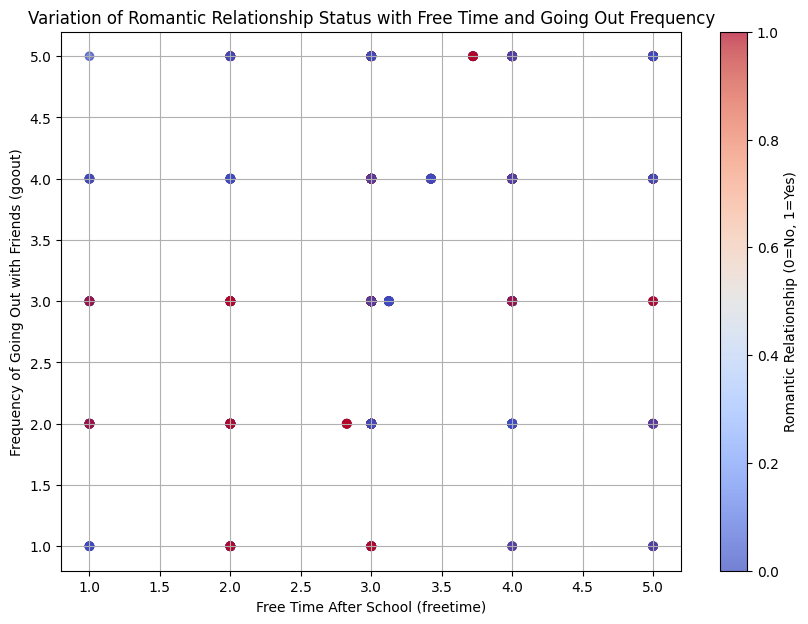

In [352]:
print("QUESTION 5: Do students who spend more free time after school and go out with friends more frequently tend to be in romantic relationships?")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df['freetime'],
    df['goout'],
    c=df['romantic'],
    cmap='coolwarm',
    alpha=0.7
)
plt.colorbar(scatter, label='Romantic Relationship (0=No, 1=Yes)')
plt.xlabel('Free Time After School (freetime)')
plt.ylabel('Frequency of Going Out with Friends (goout)')
plt.title('Variation of Romantic Relationship Status with Free Time and Going Out Frequency')
plt.grid(True)
plt.show()

In [353]:
print("INFERENCE: The scatter plot reveals that students in romantic relationships are more often found among those with higher free time and a greater frequency of going out with friends. In contrast, students with less free time and lower social activity are less likely to be in relationships. This suggests that being more socially active and having more free time are both positively associated with the likelihood of being in a romantic relationship.")

INFERENCE: The scatter plot reveals that students in romantic relationships are more often found among those with higher free time and a greater frequency of going out with friends. In contrast, students with less free time and lower social activity are less likely to be in relationships. This suggests that being more socially active and having more free time are both positively associated with the likelihood of being in a romantic relationship.


In [354]:
print("Hence Free time and time spent out with friend are imp factors while analyzing relationship status")

Hence Free time and time spent out with friend are imp factors while analyzing relationship status


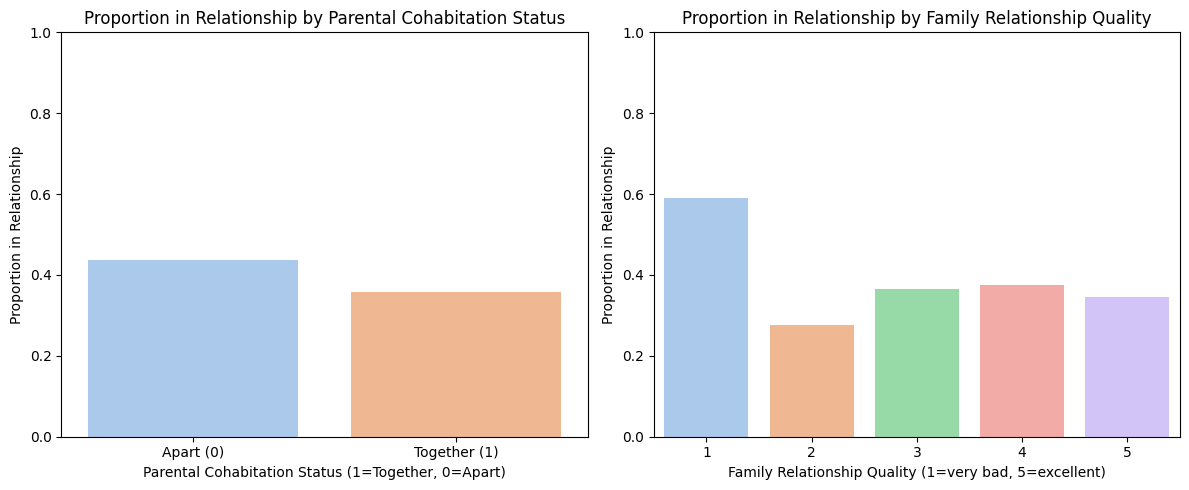

In [355]:
"QUESTION 6: How do parental cohabitation status and family relationship quality together influence students' likelihood of being in romantic relationships? "

# Calculate the proportion of students in a romantic relationship for each Pstatus group
romantic_rate_pstatus = df.groupby('Pstatus')['romantic'].mean().reset_index()

# Calculate the average romantic relationship rate by family relationship quality (famrel)
romantic_rate_famrel = df.groupby('famrel')['romantic'].mean().reset_index()

# Plotting both in the same figure with two subplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Pstatus', y='romantic', data=romantic_rate_pstatus, palette='pastel')
plt.title('Proportion in Relationship by Parental Cohabitation Status')
plt.xlabel('Parental Cohabitation Status (1=Together, 0=Apart)')
plt.ylabel('Proportion in Relationship')
plt.ylim(0, 1)
plt.xticks([0, 1], ['Apart (0)', 'Together (1)'])

plt.subplot(1, 2, 2)
sns.barplot(x='famrel', y='romantic', data=romantic_rate_famrel, palette='pastel')
plt.title('Proportion in Relationship by Family Relationship Quality')
plt.xlabel('Family Relationship Quality (1=very bad, 5=excellent)')
plt.ylabel('Proportion in Relationship')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


In [356]:
print("INFERENCE: The plots show that students whose parents are apart are more likely to be in romantic relationships than those whose parents are together. Additionally, students with very poor family relationship quality have the highest likelihood of being in relationships, while those with better family relationships show a lower and more consistent proportion. This suggests that family instability or weaker family bonds may lead students to seek emotional connection and support through romantic relationships.")

INFERENCE: The plots show that students whose parents are apart are more likely to be in romantic relationships than those whose parents are together. Additionally, students with very poor family relationship quality have the highest likelihood of being in relationships, while those with better family relationships show a lower and more consistent proportion. This suggests that family instability or weaker family bonds may lead students to seek emotional connection and support through romantic relationships.


In [357]:
print("Hence, parental status and family relations are also imp factor while determining relationship status")

Hence, parental status and family relations are also imp factor while determining relationship status


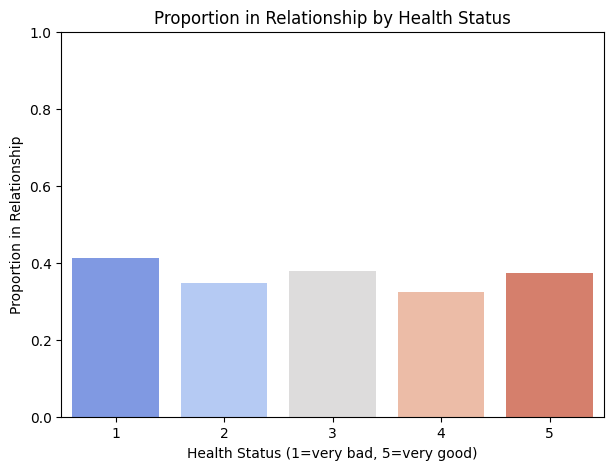

In [358]:
"QUESTION 7: Is there a relationship between students’ self-reported health status and their likelihood of being in a romantic relationship?"
# Calculate the proportion of students in a romantic relationship for each health status
romantic_rate_health = df.groupby('health')['romantic'].mean().reset_index()

# Bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x='health', y='romantic', data=romantic_rate_health, palette='coolwarm')
plt.title('Proportion in Relationship by Health Status')
plt.xlabel('Health Status (1=very bad, 5=very good)')
plt.ylabel('Proportion in Relationship')
plt.ylim(0, 1)
plt.show()

In [359]:
print("The bar plot shows that the proportion of students in romantic relationships does not vary much across different self-reported health statuses. Students with very poor health (1) actually have a slightly higher likelihood of being in a relationship compared to those with better health, but overall, the differences are small and there is no clear upward or downward trend. This suggests that self-reported health status is not a strong predictor of whether a student is in a romantic relationship")

The bar plot shows that the proportion of students in romantic relationships does not vary much across different self-reported health statuses. Students with very poor health (1) actually have a slightly higher likelihood of being in a relationship compared to those with better health, but overall, the differences are small and there is no clear upward or downward trend. This suggests that self-reported health status is not a strong predictor of whether a student is in a romantic relationship


#PREDICTION OF FEATUREs


In [360]:
print('''Feature 1, as clear in the correlation matrix has quite high correlation to 
failures, 
Dalc, 
relationship status
and others, which generally increase with the age of the person.
Also since the values are in the range og 15-18, it is quite likely to be age.
Hence, feature 1 is AGE.''')

Feature 1, as clear in the correlation matrix has quite high correlation to 
failures, 
Dalc, 
relationship status
and others, which generally increase with the age of the person.
Also since the values are in the range og 15-18, it is quite likely to be age.
Hence, feature 1 is AGE.


In [361]:
print('''Feature 2 has high correlation with the grades, hence it is most probably related to grades and corresponds to number of hours studied per day''')

Feature 2 has high correlation with the grades, hence it is most probably related to grades and corresponds to number of hours studied per day


In [362]:
print('''Feature 3 has high correlation with
Dalc,
goout
and significant negative correlation with grades
might correspond Number of parties attended in a week''')

Feature 3 has high correlation with
Dalc,
goout
and significant negative correlation with grades
might correspond Number of parties attended in a week


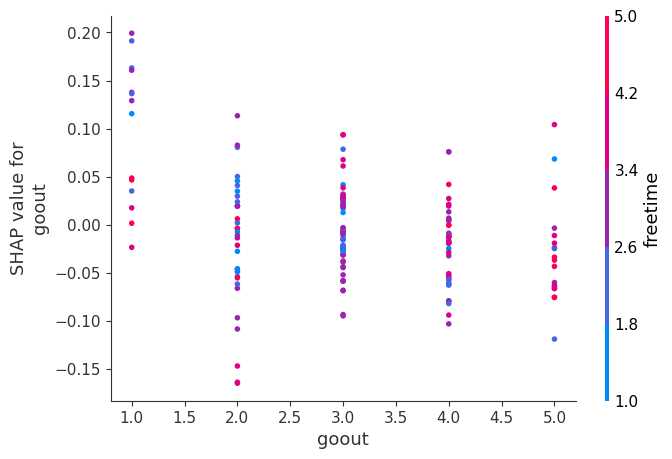

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap


# Select features for the model (based on graph and questions asked)
features = [
    'goout',        
    'freetime',    
    'Pstatus',     
    'famrel',         
    'health',     
    'absences',    
    
]
X = df[features]
y = df['romantic']  # 1=in relationship, 0=not in relationship

# Split into train and test for demonstration
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# --- SHAP analysis ---
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# SHAP interaction plot for 'goout'
shap.dependence_plot(
    'goout',          # Main feature for x-axis
    shap_values[1],   # SHAP values for class 1
    X_test,           # Feature matrix
    interaction_index='freetime'  # Feature for color/interactions

)

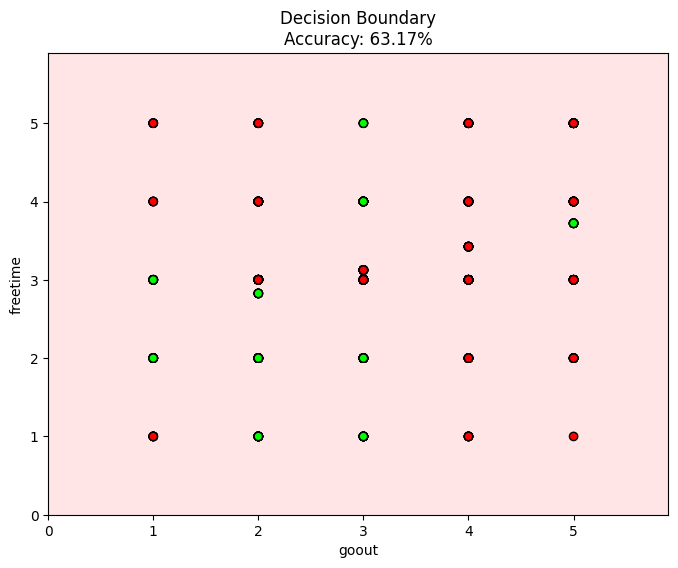

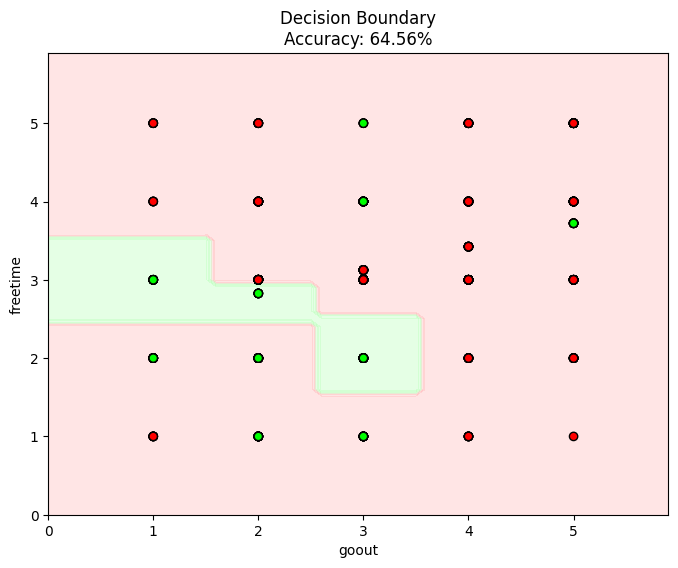

In [364]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

def plot_decision_boundary(model, X, y, features):
    X_selected = X[features].values

    # Fit the model on selected features
    model.fit(X_selected, y)

    # Predict on training data to get accuracy
    y_pred = model.predict(X_selected)
    accuracy = accuracy_score(y, y_pred)


    x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
    y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

    # Plot points with color = true labels
    plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y, cmap=cmap_bold, edgecolor='k')

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(f"Decision Boundary\nAccuracy: {accuracy * 100:.2f}%")
    plt.show()

from sklearn.linear_model import LogisticRegression

features = ['goout',        
    'freetime']
plot_decision_boundary(LogisticRegression(), X, y, features)
plot_decision_boundary(RandomForestClassifier(), X, y, features)
#First plot is of Logistic Regression and the second one is for RandomForest Classifier.

In [365]:
! pip install shap

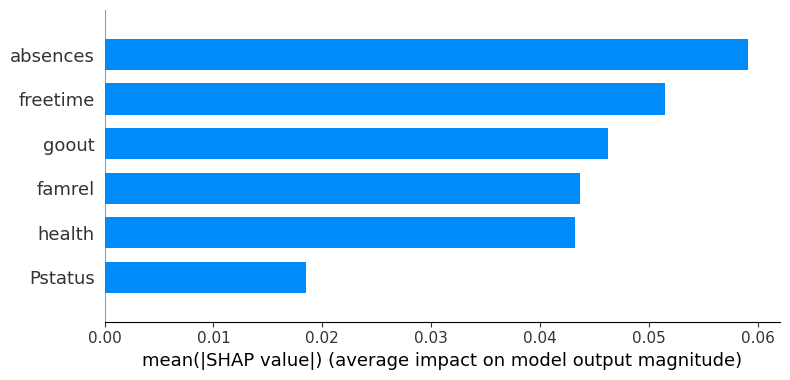

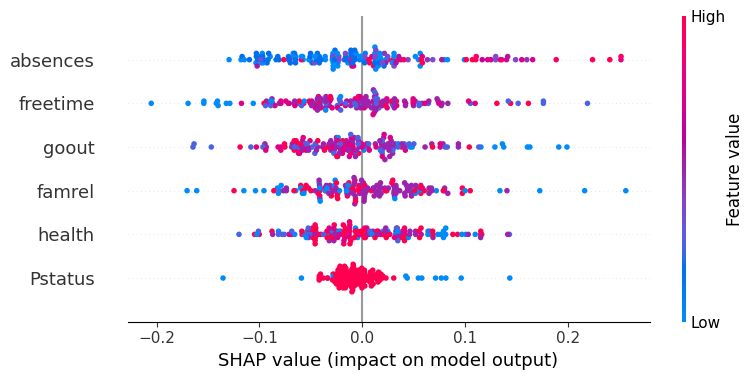

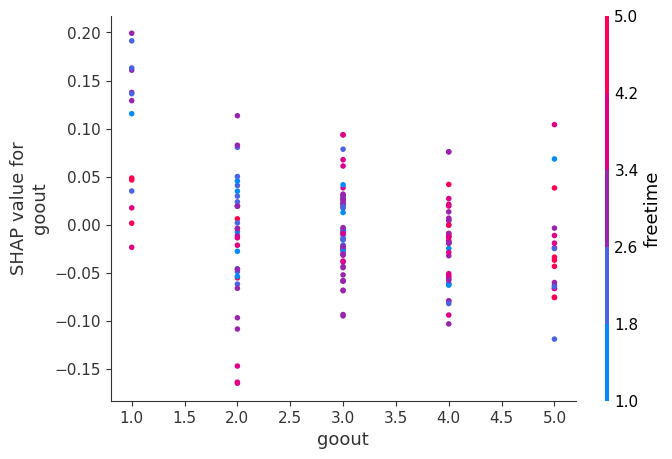

In [370]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt



# Select relevant features
features = ['goout', 'freetime', 'Pstatus', 'famrel', 'health', 'absences']
X = df[features]
y = df['romantic']  # Target variable already encoded as 1/0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Train Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# SHAP analysis
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot (global feature importance)
shap.summary_plot(shap_values[1], X_test, plot_type="bar", show=True)

# SHAP detailed summary plot (shows direction and spread)
shap.summary_plot(shap_values[1], X_test, show=True)

# SHAP dependence plot for 'goout' colored by 'freetime'
shap.dependence_plot('goout', shap_values[1], X_test, interaction_index='freetime')



In [371]:
print('''SHAP Summary Plot Interpretation 
Absences: Higher absences (red) generally push the model toward predicting a relationship, while lower absences (blue) have less impact or even a slight negative effect.

famrel (Family Relationship Quality):
Lower family relationship quality (blue/purple) increases the likelihood of being in a relationship, while higher quality (red) tends to decrease it.

Pstatus (Parental Cohabitation):
Students with Pstatus=1 (together, red) are less likely to be in a relationship, while Pstatus=0 (apart, blue) increases the likelihood.

health:
Lower health (blue) slightly increases the chance of being in a relationship, while higher health (red) has a small negative or neutral effect.

freetime:
More free time (red) pushes the prediction toward being in a relationship; less free time (blue) has the opposite effect.

goout (Going Out Frequency):
Higher values (red) strongly increase the probability of being in a relationship, while lower values (blue) decrease it.

In summary:
Students who go out more, have more free time, more absences, lower family relationship quality, lower health, or whose parents are apart are more likely to be predicted as being in a romantic relationship by the model.

Related
What are the main insights I can gain from the third photo in my analysis
How does the third image help me understand feature contributions better
In what ways does the third visual element differ from previous ones for my data
Why is focusing on the details in the third photo important for my interpretation
How can I use information from this third image to improve my model understanding
''')

SHAP Summary Plot Interpretation 
Absences: Higher absences (red) generally push the model toward predicting a relationship, while lower absences (blue) have less impact or even a slight negative effect.

famrel (Family Relationship Quality):
Lower family relationship quality (blue/purple) increases the likelihood of being in a relationship, while higher quality (red) tends to decrease it.

Pstatus (Parental Cohabitation):
Students with Pstatus=1 (together, red) are less likely to be in a relationship, while Pstatus=0 (apart, blue) increases the likelihood.

health:
Lower health (blue) slightly increases the chance of being in a relationship, while higher health (red) has a small negative or neutral effect.

freetime:
More free time (red) pushes the prediction toward being in a relationship; less free time (blue) has the opposite effect.

goout (Going Out Frequency):
Higher values (red) strongly increase the probability of being in a relationship, while lower values (blue) decrease it.